In [2]:
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel('/content/soc.xlsx')
df

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9988,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9989,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9990,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


- There are unnecessary columns deleting as they don't involve in forecasting.
- Taking the sales value of Category **Furniture**

In [4]:
df_new = df.loc[df['Category'] == 'Furniture']
cols = [ 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount','Profit']
df_new.drop(cols, axis=1, inplace=True)
df_new = df_new.sort_values('Order Date')
df_new

<ipython-input-4-55939a5c2df7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.drop(cols, axis=1, inplace=True)


,Order Date,Sales
7473,2014-01-06,2573.820
7659,2014-01-07,76.728
866,2014-01-10,51.940
716,2014-01-11,9.940
2978,2014-01-13,545.940
...,...,...
7635,2017-12-29,258.750
7631,2017-12-29,1207.840
5130,2017-12-29,101.120
7634,2017-12-29,300.980


- On some date there are multiple values of sales hence grouping them by date and taking sum of Sale values.

In [5]:
df_new = df_new.groupby('Order Date').sum().reset_index()
df_new

,Order Date,Sales
0,2014-01-06,2573.8200
1,2014-01-07,76.7280
2,2014-01-10,51.9400
3,2014-01-11,9.9400
4,2014-01-13,879.9390
...,...,...
884,2017-12-24,1393.4940
885,2017-12-25,832.4540
886,2017-12-28,551.2568
887,2017-12-29,2330.7180


In [6]:
df_new = df_new.set_index('Order Date')
df_new

,Sales
Order Date,
2014-01-06,2573.8200
2014-01-07,76.7280
2014-01-10,51.9400
2014-01-11,9.9400
2014-01-13,879.9390
...,...
2017-12-24,1393.4940
2017-12-25,832.4540
2017-12-28,551.2568


- Making Monthly dataframe

In [7]:
df_new_M = df_new.resample('M').sum()
df_new_M

,Sales
Order Date,
2014-01-31,6242.5250
2014-02-28,1839.6580
2014-03-31,14573.9560
2014-04-30,7663.4650
2014-05-31,6912.7870
2014-06-30,13206.1256
2014-07-31,10821.0510
2014-08-31,7320.3465
2014-09-30,23816.4808


- Making traning and testing dataset.
- **Train Dataset**: All rows except the last 12 rows
  - Used to build and train the model.
  - Helps the model learn patterns and relationships in the data.
  
- **Test Dataset**: Last 12 rows
  - Used to evaluate the model's performance on unseen data.
  - Ensures that the model generalizes well to new inputs.

In [8]:
train = df_new_M.iloc[:-12]
test = df_new_M.iloc[-12:]
print( train.shape , test.shape )

(36, 1) (12, 1)


# SUMMARY STATISTICS

In [9]:
from pandas import read_csv

X1, X2 = train,test
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=14620.309836, mean2=17948.939100
variance1=76407002.629945, variance2=102333128.806394


<ipython-input-9-92ae75425652>:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('mean1=%f, mean2=%f' % (mean1, mean2))
<ipython-input-9-92ae75425652>:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('variance1=%f, variance2=%f' % (var1, var2))


- Values looking like Gaussian, therefore mean & variance values **can be** meaningful indicating that the time series is **stationary**.


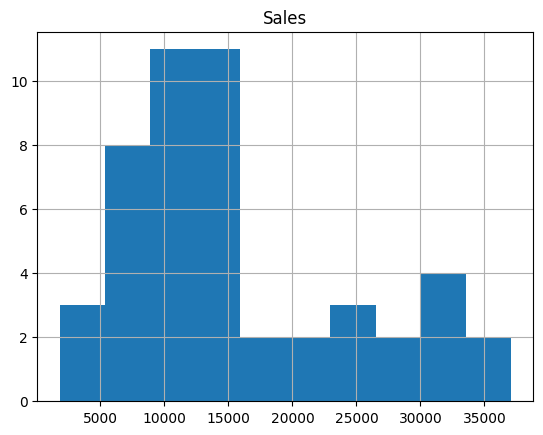

In [10]:
from pandas import read_csv
from matplotlib import pyplot
df_new_M.hist()
pyplot.show()

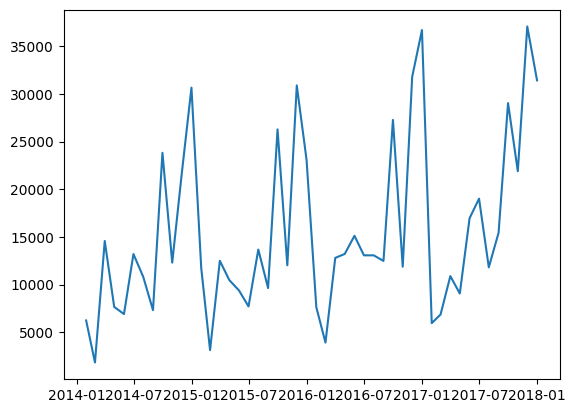

In [11]:
plt.plot(df_new_M)
plt.show()

- The **Augmented Dickey-Fuller (ADF)** test is a statistical test used to determine if a time series is stationary or if it has a unit root. Stationarity is important in time series analysis because many models assume that the underlying data is stationary.


*  Null Hypothesis (H0): The time series has a unit root (i.e.,it is non-stationary).
*  Alternative Hypothesis (H1): The time series does not have a unit root (i.e., it is stationary).




In [12]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    #rolmean = pd.rolling_mean(timeseries, window=12)
    # Convert DataFrame to Series
    if isinstance(timeseries, pd.DataFrame):
        timeseries = timeseries.squeeze()

    rolmean = pd.Series(timeseries).rolling(window=12).mean()
    #rolstd = pd.rolling_std(timeseries, window=12)
    rolstd = pd.Series(timeseries).rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

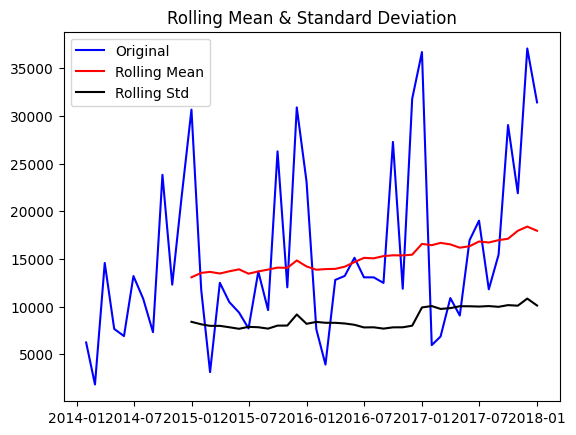

Results of Dickey-Fuller Test:
Test Statistic                 -4.697056
p-value                         0.000085
#Lags Used                      0.000000
Number of Observations Used    47.000000
Critical Value (1%)            -3.577848
Critical Value (5%)            -2.925338
Critical Value (10%)           -2.600774
dtype: float64


In [13]:
test_stationarity(df_new_M)

### Test Results

- **Test Statistic: -4.697056**
  - This is the value of the ADF test statistic. It measures how far the time series deviates from being non-stationary. **A more negative value indicates stronger evidence against the null hypothesis.**

- **p-value: 0.000085**
  - The p-value represents the probability of obtaining a test statistic at least as extreme as the one observed, under the null hypothesis (that the time series has a unit root). A p-value less than the common significance levels (e.g., 0.01, 0.05, or 0.10) suggests rejecting the null hypothesis.

- **#Lags Used: 0**
  - This indicates that no lags were used in the test. In practice, you might include lags to account for autocorrelation in the residuals, but here it seems no additional lags were necessary.

- **Number of Observations Used: 47**
  - The number of data points used in the test.

- **Critical Values**:
  - **Critical Value (1%): -3.577848**
  - **Critical Value (5%): -2.925338**
  - **Critical Value (10%): -2.600774**
  - These are the critical values for the test statistic at different confidence levels (1%, 5%, and 10%). They provide a threshold to compare against the test statistic.

### Interpretation

- **Comparison of Test Statistic with Critical Values**:
  - The test statistic (-4.697056) is less than all the critical values (at 1%, 5%, and 10% levels). This means that the test statistic falls into the rejection region for the null hypothesis.

- **p-value**:
  - The p-value (0.000085) is very small, indicating a strong rejection of the null hypothesis.

### Conclusion

- **Reject the Null Hypothesis**: Since the test statistic is less than the critical values and the p-value is very small, you reject the null hypothesis of the Dickey-Fuller test.
- **Stationarity**: The results suggest that ***the time series is stationary, meaning it does not have a unit root and its statistical properties*** (mean, variance) do not change over time.


In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_new_M)

In [15]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

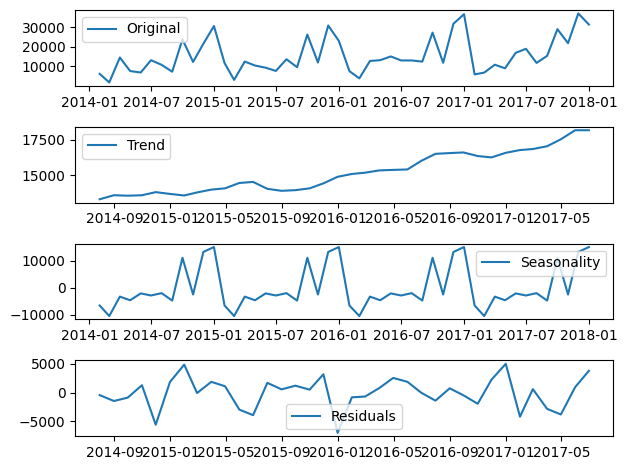

In [16]:
plt.subplot(411)
plt.plot(df_new_M, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

- The above plots shows the different components of Time Series, it shows that:
    

> The TS has some trend absence of Seasonality.


> The TS shows Trend component.









Text(0.5, 1.0, 'Autocorrelation Function')

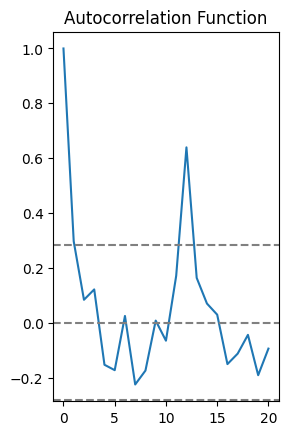

In [17]:
#FINAL FORECASTING
from statsmodels.tsa.arima_model import ARIMA
#ACF/PACF PLOTS

#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(df_new_M, nlags=20)
lag_pacf = pacf(df_new_M, nlags=20, method='ols')

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_new_M)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_new_M)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

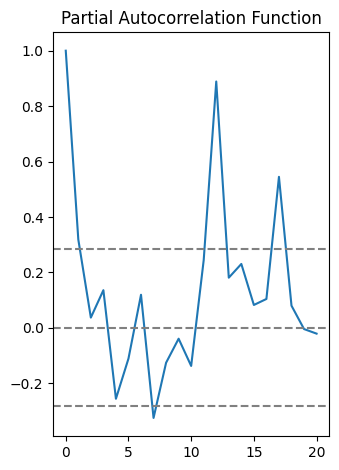

In [18]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_new_M)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_new_M)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()


| Feature                | ACF (Autocorrelation Function)                | PACF (Partial Autocorrelation Function)           |
|------------------------|-----------------------------------------------|---------------------------------------------------|
| **Definition**         | Measures correlation between series and lags. | Measures partial correlation between series and lags. |
| **Purpose**            | Identifies the order of MA component.          | Identifies the order of AR component.            |
| **Plot**               | Shows autocorrelations for different lags.     | Shows partial autocorrelations for different lags.|
| **Significance**       | Significant spikes suggest MA terms.          | Significant spikes suggest AR terms.            |
| **Cutoff Pattern**     | Shows if ACF cuts off (MA process).            | Shows if PACF cuts off (AR process).             |
| **Usage**              | Useful for identifying MA order in models.    | Useful for identifying AR order in models.      |
| **p, d, q Values**     | - **q (MA Order)**: Determined by ACF cut-off. | - **p (AR Order)**: Determined by PACF cut-off. |
|                        |


## **MODEL BUILDING**

In [19]:

#training will be 66%, test will be 33% as per our model
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
from numpy.linalg import LinAlgError
import warnings
warnings.filterwarnings("ignore")

In [20]:
history = [x for x in train]
predictions = list()
#test.reset_index()

In [21]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

Taken p,d,q = 1,0,1 for Trail

In [22]:
model=sm.tsa.statespace.SARIMAX(train ['Sales'],order=(1, 0, 1),seasonal_order=(5,1,0,12))
results=model.fit()

- We have use SARIMAX Model.
The main difference between **ARIMA** and **SARIMAX** models lies in their handling of seasonality and exogenous variables:

### 1. **ARIMA (AutoRegressive Integrated Moving Average)**:
   - **Purpose**: ARIMA models are designed for univariate time series forecasting (i.e., forecasting based only on past values of the series).
   - **Components**:
     - **AutoRegressive (AR)**: Uses past values of the time series for prediction.
     - **Integrated (I)**: Applies differencing to the time series to make it stationary.
     - **Moving Average (MA)**: Incorporates past forecast errors to improve the prediction.
   - **Order Parameters**:
     - **p**: Number of lag observations (AR).
     - **d**: Number of times differencing is applied (I).
     - **q**: Number of lagged forecast errors (MA).
   - **Seasonality**: ARIMA does not explicitly handle seasonality. You can extend it manually using seasonal differencing.

### 2. **SARIMAX (Seasonal AutoRegressive Integrated Moving Average with eXogenous regressors)**:
   - **Purpose**: SARIMAX extends ARIMA to handle **seasonality** and **exogenous variables** (additional external factors).
   - **Seasonality**:
     - SARIMAX adds a **seasonal component** to the ARIMA model to deal with repeating patterns over fixed intervals (like yearly, quarterly, or monthly patterns).
     - **Seasonal Order** parameters:
       - **(P, D, Q, s)**: Analogous to ARIMA’s p, d, q but for the seasonal component:
         - **P**: Seasonal AR term.
         - **D**: Seasonal differencing.
         - **Q**: Seasonal MA term.
         - **s**: Length of the seasonal cycle (e.g., 12 for monthly data with yearly seasonality).
   - **Exogenous Variables (X)**: SARIMAX allows for the inclusion of **exogenous predictors**, which are external factors (like economic indicators, weather data, etc.) that might influence the time series.

### Key Differences:
| Feature              | ARIMA                            | SARIMAX                        |
|----------------------|----------------------------------|--------------------------------|
| **Seasonality**       | Not explicitly modeled          | Explicitly models seasonal patterns with seasonal order (P, D, Q, s) |
| **Exogenous Variables** | Not supported                  | Supported (can include external predictors) |
| **Complexity**        | Simpler                         | More complex (handles seasonality and external regressors) |

If you need to model **seasonality** or include **external factors** in your time series forecasting, SARIMAX is the preferred choice.

In [23]:
start = len(train)
end = len(train) + len(test) - 1
pred = results.predict(start,end,dynamic=True)

pred.index = df_new_M.index[start:end+1]
print(pred)

Order Date
2017-01-31     9963.956715
2017-02-28     4978.702889
2017-03-31    13422.402167
2017-04-30    14160.442649
2017-05-31    15587.307772
2017-06-30    12435.337182
2017-07-31    14365.444493
2017-08-31    13214.529749
2017-09-30    28254.063191
2017-10-31    12578.198726
2017-11-30    33701.104327
2017-12-31    34520.915205
Freq: M, Name: predicted_mean, dtype: float64


<Axes: xlabel='Order Date'>

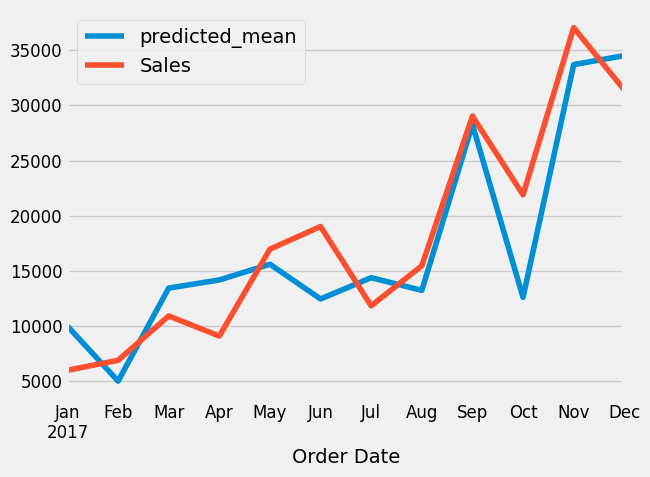

In [24]:
pred.plot(legend = True)
test['Sales'].plot(legend = True)

In [25]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(pred,test['Sales']))
print(rmse)

4248.776942899664


The RMSE : Root Mean Square Error value is : **4248.776942899664**

**Grid search** in time series forecasting is a method used to systematically search for the best set of model parameters (such as those in ARIMA, SARIMA, SARIMAX, etc.) that produce the most accurate forecasts. It involves evaluating the model's performance for different combinations of parameter values and selecting the one that minimizes the error.

### How Grid Search Works in Time Series Forecasting:

1. **Model Parameters**:
   - In models like **ARIMA** or **SARIMAX**, there are multiple parameters to tune:
     - For ARIMA: `(p, d, q)` where:
       - `p`: Order of the autoregressive part.
       - `d`: Order of differencing.
       - `q`: Order of the moving average.
     - For **SARIMAX** (with seasonality), we also tune `(P, D, Q, s)` for the seasonal components.

2. **Grid Search Process**:
   - **Define a grid of parameters**: You create a list of possible values for each of the parameters. For example, for ARIMA:
     - `p_values = [0, 1, 2]`
     - `d_values = [0, 1]`
     - `q_values = [0, 1, 2]`
   - **Try every combination**: The grid search method tries every combination of the parameter values. For the above example, it would test all combinations like `(p=0, d=0, q=0)`, `(p=1, d=0, q=0)`, etc.
   
3. **Train and Evaluate Each Model**:
   - For each parameter combination, you train the model on the training data.
   - The performance of each model is evaluated using a metric like **RMSE (Root Mean Squared Error)**, **MAE (Mean Absolute Error)**, or **AIC (Akaike Information Criterion)** to measure how well the model predicts the test data.

4. **Select the Best Model**:
   - After testing all parameter combinations, the model with the best performance (i.e., lowest error) is chosen as the optimal model for forecasting.



### Advantages of Grid Search:
- **Exhaustive**: It tries every possible combination of parameters within the defined grid, ensuring that the best model parameters are found.
- **Simple to implement**: It's a straightforward brute-force approach.

### Disadvantages:
- **Computationally expensive**: For large grids or long time series data, it can be very slow since it tests every combination of parameters, especially when there are many parameters.
- **May miss optimal parameters**: If the grid of values is not fine-tuned (e.g., too large or too coarse), it could overlook better-performing parameter values between grid points.

In [28]:
from math import sqrt
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

def evaluate_models(train, test, p_values, d_values, q_values, df_new_M):
    train = train.astype('float32')
    test = test.astype('float32')
    best_score, best_cfg = float("inf"), None

    for p in p_values:
        for d in d_values:
            for q in q_values:
                try:
                    # Define the SARIMAX model
                    model = sm.tsa.statespace.SARIMAX(train['Sales'],
                                                      order=(p, d, q),
                                                      seasonal_order=(5, 1, 0, 12))
                    results = model.fit()

                    # Forecasting
                    start = len(train)
                    end = len(train) + len(test) - 1
                    pred = results.predict(start=start, end=end, dynamic=True)

                    # Align prediction index with the test set
                    pred.index = df_new_M.index[start:end+1]

                    # Calculate RMSE
                    rmse = sqrt(mean_squared_error(test['Sales'], pred))

                    # Print the RMSE for each model configuration
                    print(f'SARIMAX({p},{d},{q}) RMSE={rmse:.3f}')

                    # Save the best model configuration
                    if rmse < best_score:
                        best_score, best_cfg = rmse, (p, d, q)

                except Exception as e:
                    print(f"Error with SARIMAX({p},{d},{q}): {e}")
                    continue

    print(f'Best SARIMAX{best_cfg} RMSE={best_score:.3f}')


In [29]:
import datetime
print(datetime.datetime.now())
p_values = [1,2,3,4,5]
d_values = [0,1]
q_values = [1,2,3]
warnings.filterwarnings("ignore")
evaluate_models(train, test, p_values, d_values, q_values, df_new_M)
print(datetime.datetime.now())

2024-09-08 16:34:40.178556
SARIMAX(1,0,1) RMSE=4248.777
SARIMAX(1,0,2) RMSE=4386.124
SARIMAX(1,0,3) RMSE=4234.454
SARIMAX(1,1,1) RMSE=7255.160
SARIMAX(1,1,2) RMSE=7641.220
SARIMAX(1,1,3) RMSE=4877.725
SARIMAX(2,0,1) RMSE=4395.203
SARIMAX(2,0,2) RMSE=5224.518
SARIMAX(2,0,3) RMSE=4393.376
SARIMAX(2,1,1) RMSE=7507.738
SARIMAX(2,1,2) RMSE=6257.151
SARIMAX(2,1,3) RMSE=5341.241
SARIMAX(3,0,1) RMSE=4425.624
SARIMAX(3,0,2) RMSE=5305.180
SARIMAX(3,0,3) RMSE=5374.819
SARIMAX(3,1,1) RMSE=7467.475
SARIMAX(3,1,2) RMSE=5598.900
SARIMAX(3,1,3) RMSE=6881.690
SARIMAX(4,0,1) RMSE=4465.057
SARIMAX(4,0,2) RMSE=5284.504
SARIMAX(4,0,3) RMSE=5443.404
SARIMAX(4,1,1) RMSE=5350.883
SARIMAX(4,1,2) RMSE=7104.736
SARIMAX(4,1,3) RMSE=6756.138
SARIMAX(5,0,1) RMSE=4488.309
SARIMAX(5,0,2) RMSE=5444.075
SARIMAX(5,0,3) RMSE=5351.563
SARIMAX(5,1,1) RMSE=6118.499
SARIMAX(5,1,2) RMSE=11531.684
SARIMAX(5,1,3) RMSE=6945.166
Best SARIMAX(1, 0, 3) RMSE=4234.454
2024-09-08 16:39:17.624011


**Best SARIMAX(1, 0, 3) RMSE=4234.454**

In [30]:
model=sm.tsa.statespace.SARIMAX(train ['Sales'],order=(1, 0, 3),seasonal_order=(5,1,0,12))
results=model.fit()

start = len(train)
end = len(train) + len(test) - 1
pred = results.predict(start,end,dynamic=True)

pred.index = df_new_M.index[start:end+1]
print(pred)

Order Date
2017-01-31    10944.482562
2017-02-28     5301.777326
2017-03-31    14084.089289
2017-04-30    14624.386919
2017-05-31    16019.780755
2017-06-30    13105.469693
2017-07-31    14928.894876
2017-08-31    13708.098129
2017-09-30    28981.734910
2017-10-31    13227.401925
2017-11-30    34283.463270
2017-12-31    35379.365190
Freq: M, Name: predicted_mean, dtype: float64


<Axes: xlabel='Order Date'>

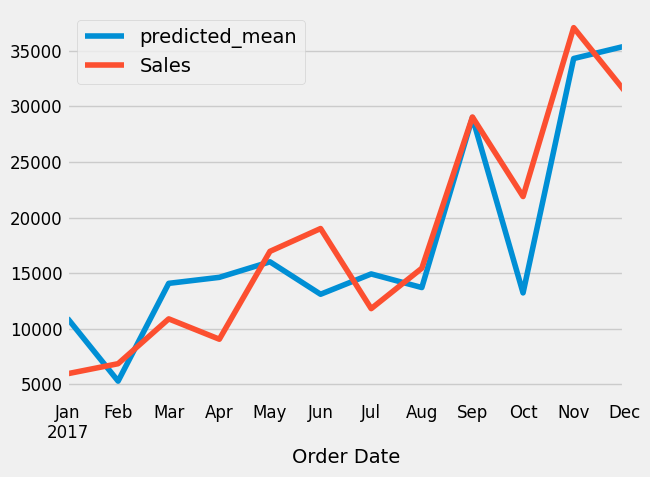

In [31]:
pred.plot(legend = True)
test['Sales'].plot(legend = True)

- The above graph shows that the predicted value and real values closely resembles.

<Axes: xlabel='Order Date'>

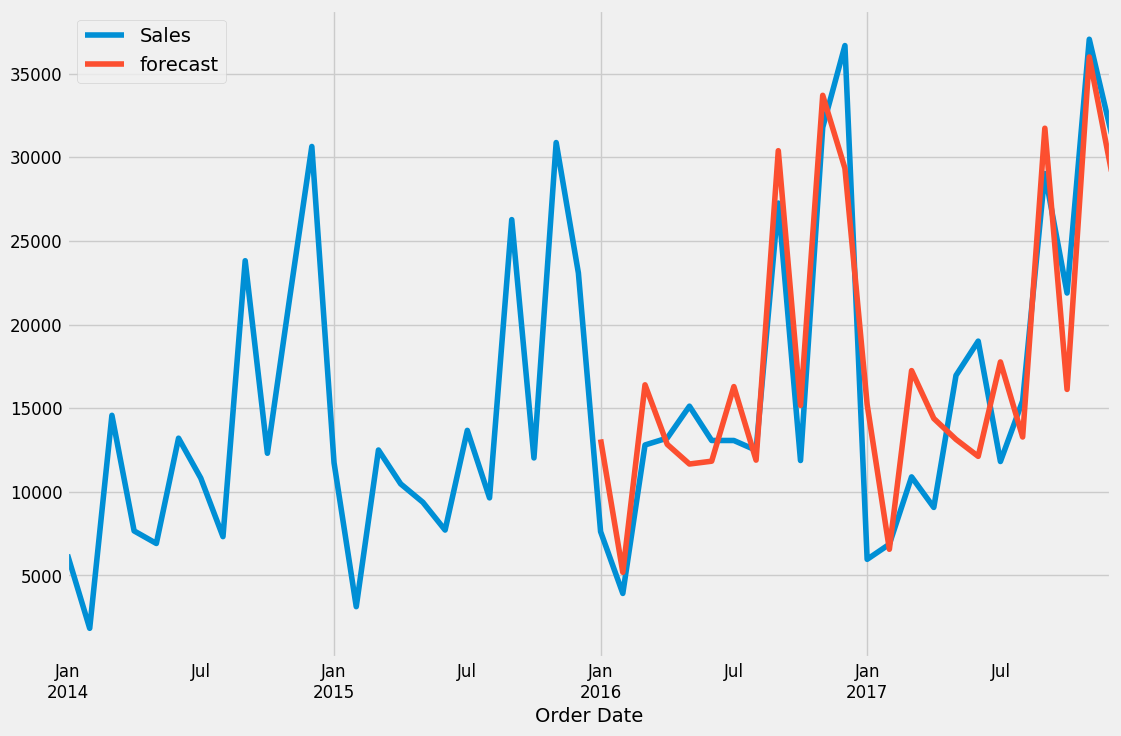

In [32]:
df_new_M['forecast']=results.predict(start=24,end=48,dynamic=True)
df_new_M[['Sales','forecast']].plot(figsize=(12,8))

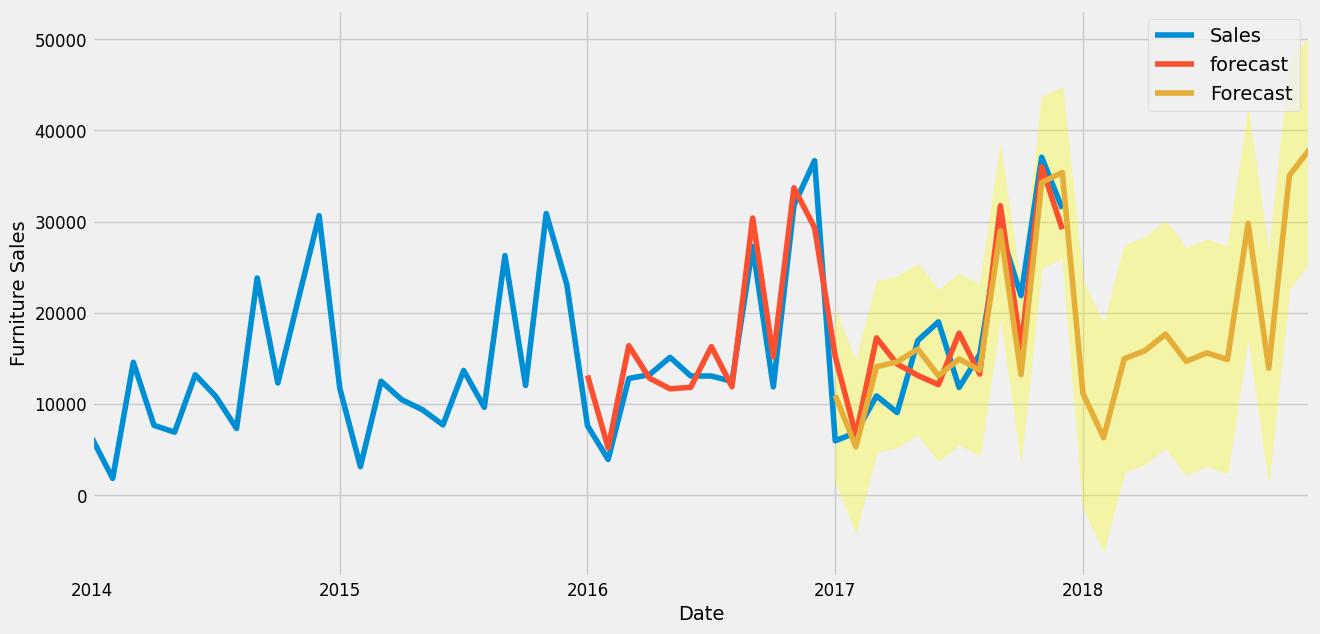

2017-01-31    10944.482562
2017-02-28     5301.777326
2017-03-31    14084.089289
2017-04-30    14624.386919
2017-05-31    16019.780755
2017-06-30    13105.469693
2017-07-31    14928.894876
2017-08-31    13708.098129
2017-09-30    28981.734910
2017-10-31    13227.401925
2017-11-30    34283.463270
2017-12-31    35379.365190
2018-01-31    11149.695145
2018-02-28     6315.371726
2018-03-31    14960.033759
2018-04-30    15844.221174
2018-05-31    17660.602572
2018-06-30    14674.043694
2018-07-31    15603.219771
2018-08-31    14878.188970
2018-09-30    29810.126782
2018-10-31    13922.266775
2018-11-30    35055.904562
2018-12-31    37987.556544
Freq: M, Name: predicted_mean, dtype: float64


In [33]:
pred_uc = results.get_forecast(steps=24)
pred_ci = pred_uc.conf_int()

ax = df_new_M.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='yellow',alpha = 0.3)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')

plt.legend()
plt.show()
print(pred_uc.predicted_mean)

**Using FB Prophet**

- Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

In [34]:
from prophet import Prophet
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error

In [35]:
df_new

,Sales
Order Date,
2014-01-06,2573.8200
2014-01-07,76.7280
2014-01-10,51.9400
2014-01-11,9.9400
2014-01-13,879.9390
...,...
2017-12-24,1393.4940
2017-12-25,832.4540
2017-12-28,551.2568


In [36]:
# df_new = df_new.set_index('Order Date')
df_new_fb = df_new.resample('M').sum()
df_new_fb


,Sales
Order Date,
2014-01-31,6242.5250
2014-02-28,1839.6580
2014-03-31,14573.9560
2014-04-30,7663.4650
2014-05-31,6912.7870
2014-06-30,13206.1256
2014-07-31,10821.0510
2014-08-31,7320.3465
2014-09-30,23816.4808


The input to Prophet is always a dataframe with two columns: **ds** and **y**.
- The ds (datestamp) column should be of a YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp.
- The y column must be numeric, and represents the measurement we wish to forecast.

In [37]:
df_new_fb = df_new_fb.reset_index()
df_new_fb = df_new_fb.rename(columns={'Order Date':'ds', 'Sales':'y'})
df_new_fb


,ds,y
0,2014-01-31,6242.5250
1,2014-02-28,1839.6580
2,2014-03-31,14573.9560
3,2014-04-30,7663.4650
4,2014-05-31,6912.7870
5,2014-06-30,13206.1256
6,2014-07-31,10821.0510
7,2014-08-31,7320.3465
8,2014-09-30,23816.4808
9,2014-10-31,12304.2470


In [39]:
model = Prophet()

In [40]:
model.fit(trainfb)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa_a0i8oq/f4_8mam7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa_a0i8oq/dz9pqcxs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41535', 'data', 'file=/tmp/tmpa_a0i8oq/f4_8mam7.json', 'init=/tmp/tmpa_a0i8oq/dz9pqcxs.json', 'output', 'file=/tmp/tmpa_a0i8oq/prophet_modelx42qu651/prophet_model-20240908164818.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
16:48:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:48:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [41]:
# prompt: I want future_data from 2017-01-31 to 2017-12-31

future_data = model.make_future_dataframe(periods=365, freq='M')
future_data = future_data[(future_data['ds'] >= '2017-01-31') & (future_data['ds'] <= '2018-12-31')]
future_data


,ds
36,2017-01-31
37,2017-02-28
38,2017-03-31
39,2017-04-30
40,2017-05-31
41,2017-06-30
42,2017-07-31
43,2017-08-31
44,2017-09-30
45,2017-10-31


In [42]:
forecast_data = model.predict(future_data)
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2017-01-31,10794.306348,8051.094028,13340.725750
1,2017-02-28,5607.870473,3250.379412,7893.668329
2,2017-03-31,15793.379385,13537.800799,18252.085880
3,2017-04-30,13868.157734,11288.581285,16233.340233
4,2017-05-31,14623.035277,12194.135064,16920.724868
5,2017-06-30,15032.011821,12652.652182,17432.486843
6,2017-07-31,15231.608494,12844.004911,17535.071506
7,2017-08-31,13287.404544,10976.201483,15670.463947
8,2017-09-30,28761.230580,26351.796177,31052.347929
9,2017-10-31,14588.664227,12252.046519,16817.009696


In [43]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(forecast_data['yhat'][0:12],testfb['y']))
print(rmse)
# forecast_data['yhat']
# test['y']

4210.282847577902


The **RMSE value is : 4210.282847577902** which is lesser than the value obtained using SARIMAX model.

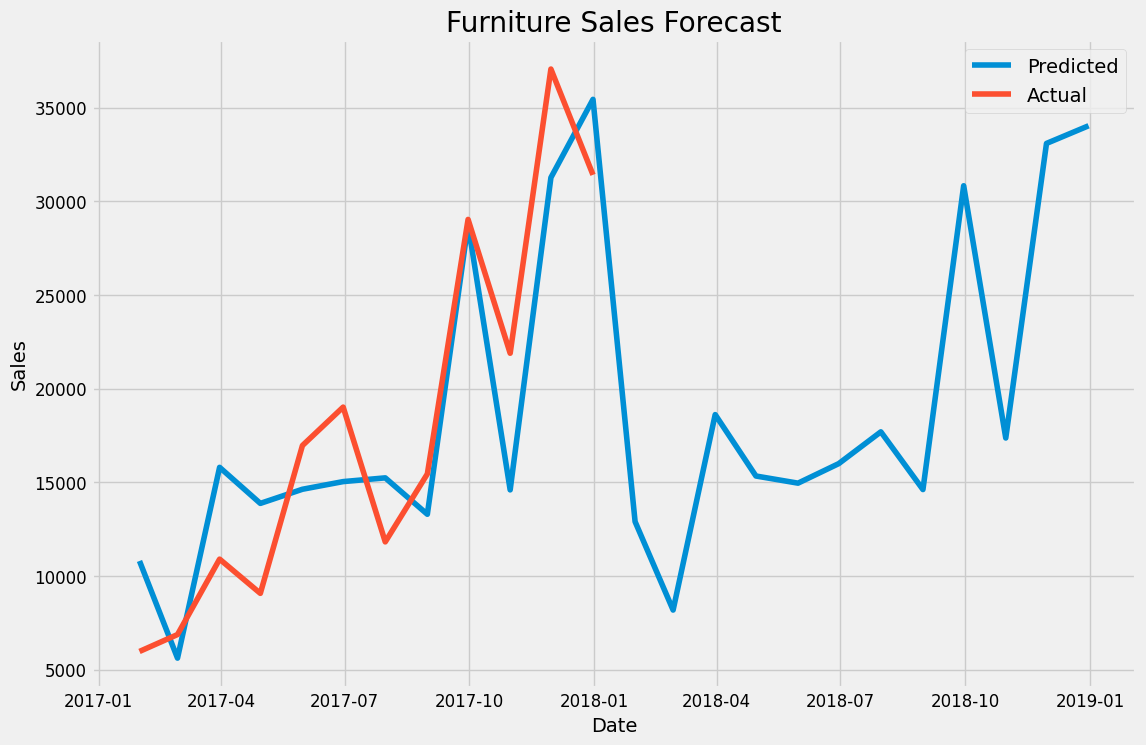

In [47]:
# prompt: plot forecast_data['yhat'],test['y'] in single plot

plt.figure(figsize=(12,8))
plt.plot(forecast_data['ds'], forecast_data['yhat'], label='Predicted')
plt.plot(testfb['ds'], testfb['y'], label='Actual')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Furniture Sales Forecast')
plt.legend()
plt.show()


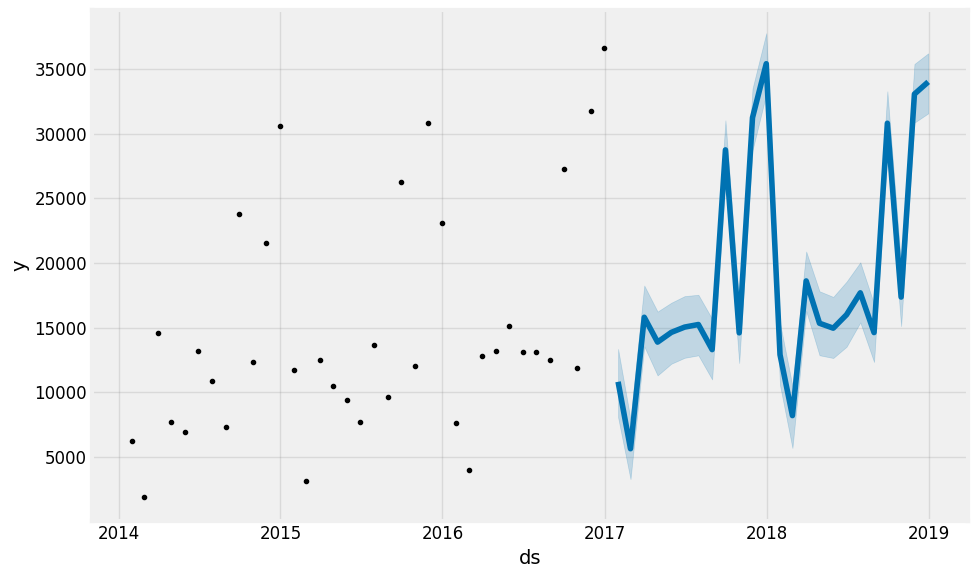

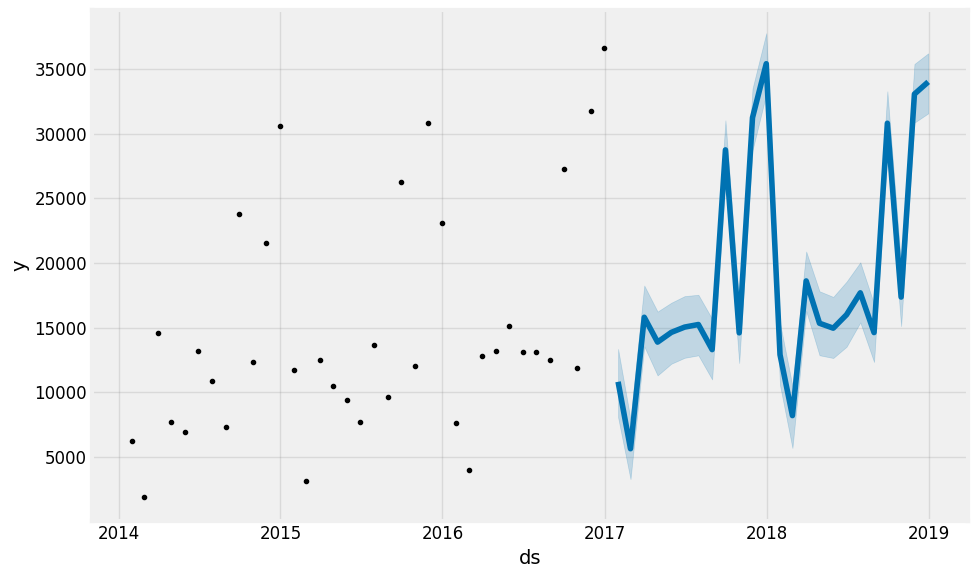

In [45]:
model.plot(forecast_data)

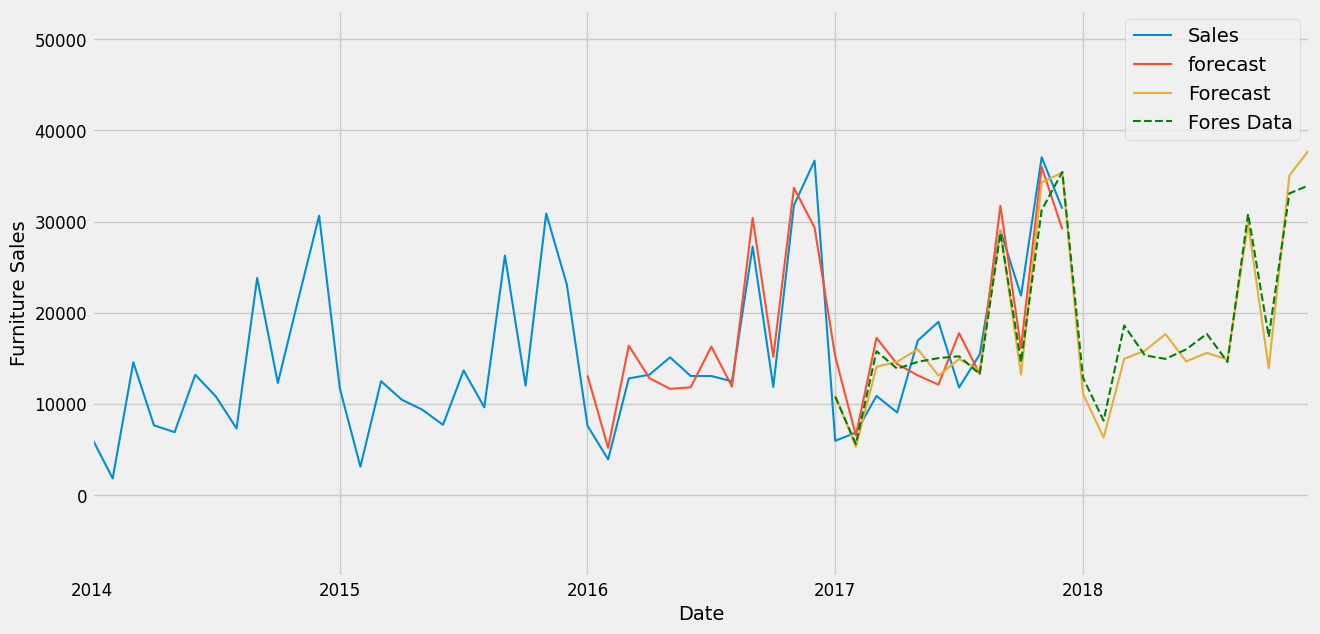

In [46]:
# Convert the index of forecast_data to DatetimeIndex
forecast_data = forecast_data.set_index(pd.to_datetime(forecast_data['ds']))

# Plot observed data with reduced line width
ax = df_new_M.plot(label='Observed', figsize=(14, 7), linewidth=1.5)

# Plot forecasted data with reduced line width
pred_uc.predicted_mean.plot(ax=ax, label='Forecast', linewidth=1.5)

# Fill the confidence interval for forecast
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='yellow', alpha=0)

# Plot additional dataframe 'fores' with reduced line width
forecast_data['yhat'].plot(ax=ax, label='Fores Data', linestyle='--', color='green', linewidth=1.5)

# Set axis labels
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')

# Show legend
plt.legend()

# Show the plot
plt.show()


The difference in RMSE (Root Mean Squared Error) values between Facebook Prophet and SARIMA can arise due to the underlying assumptions and flexibility of each model:

1. **SARIMA** (Seasonal AutoRegressive Integrated Moving Average):
   - **Advantages**:
     - SARIMA is robust for capturing seasonality and trends when the data is stationary or can be made stationary.
     - Well-suited for regularly spaced, univariate time series.
     - Provides fine control over model parameters (AR, MA, seasonal terms).
   - **Disadvantages**:
     - Less flexible for handling irregularities, holidays, or events without external intervention.
     - Requires more data preprocessing, including stationarity checks.

2. **Facebook Prophet**:
   - **Advantages**:
     - Designed to handle missing data, irregular time series, and holidays.
     - Automatically detects seasonality, trends, and changepoints.
     - Simple to implement and requires less preprocessing.
   - **Disadvantages**:
     - Less control over model details compared to SARIMA.
     - May overfit if not properly tuned for certain time series.

Facebook Prophet often performs better (lower RMSE) due to its ability to adapt to more complex seasonality, trends, and special events.

- Adding Holidays

In [59]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calender
cal = calender()

holidays = cal.holidays(start=df_new_fb.index.min(), end=df_new_fb.index.max())
holiday_df = pd.DataFrame(data = holidays , columns = ['ds'])
holiday_df['holiday'] = 'holiday'
holiday_df

,ds,holiday
0,1970-01-01,holiday


In [58]:
holidays

DatetimeIndex(['1970-01-01'], dtype='datetime64[ns]', freq=None)

In [60]:
model_with_h = Prophet(holidays = holiday_df)
model_with_h.fit(trainfb)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa_a0i8oq/5ck1wo_v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa_a0i8oq/9waedo48.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86115', 'data', 'file=/tmp/tmpa_a0i8oq/5ck1wo_v.json', 'init=/tmp/tmpa_a0i8oq/9waedo48.json', 'output', 'file=/tmp/tmpa_a0i8oq/prophet_modellpiaoh5i/prophet_model-20240908172322.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
17:23:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:23:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [61]:

future_data = model_with_h.make_future_dataframe(periods=365, freq='M')
future_data = future_data[(future_data['ds'] >= '2017-01-31') & (future_data['ds'] <= '2018-12-31')]
future_data

forecast_data = model_with_h.predict(future_data)
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(forecast_data['yhat'][0:12],testfb['y']))
print(rmse)

4210.282845584827
